In [3]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization

from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns


In [4]:
# Load international online transactions data from CSV
df= pd.read_csv('project_files/int_online_tx.csv')

<span id="exploration"></span>
#  Transaction-level exploration



<br>


In [5]:
# Dataframe dimensions
df.shape

(35116, 8)

In [6]:
# First 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


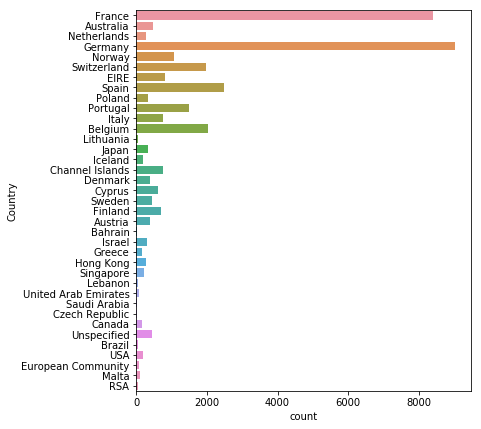

In [9]:
# Make figsize 6x7
plt.figure(figsize=(6,7))

# Bar plot by country
sns.countplot(y='Country',data=df)

<span id="cleaning"></span>
# Transaction-level cleaning



<br>


In [20]:
# Missing data by feature
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [28]:
# Only keep transactions with CustomerID's
df=df[df.CustomerID.notnull()]
df.shape

(33698, 8)

In [29]:
# Convert customer ID's into integers
df['CustomerID']=df.CustomerID.astype(int)

# Display first 5 CustomerID's in the transaction dataset
df.head()


C:\Users\virendsi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France


In [30]:
# Create 'Sales' interaction feature
df['Sales']=df.Quantity*df.UnitPrice

# Display first 5 Sales values in the transaction dataset
df.head()


C:\Users\virendsi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [32]:
# Save cleaned transaction-level data
df.to_csv('project_files/cleaned_transactions.csv',index=None)

<span id="customer-level"></span>
# Customer-level feature engineering

<br>

In [33]:
# Aggegrate invoice data
invoice_data=df.groupby('CustomerID').InvoiceNo.agg({'total_transactions':'nunique'})

# Display invoice data for first 5 customers
invoice_data.head()

C:\Users\virendsi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [35]:
# Aggregate product data
product_data=df.groupby('CustomerID').StockCode.agg({'total_products':'count','total_unique_products':'nunique'})

# Display product data for first 5 customers
product_data.head()

C:\Users\virendsi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [37]:
# Roll up sales data
sales_data=df.groupby('CustomerID').Sales.agg({'total_sales':'sum','avg_product_value':'mean'})

# Display sales data for first 5 customers
sales_data.head()

C:\Users\virendsi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,avg_product_value,total_sales
CustomerID,,
12347,23.681319,4310.00
12348,57.975484,1797.24
12349,24.076027,1757.55
12350,19.670588,334.40
12352,29.482824,2506.04


<span id="intermediary-levels"></span>
# 4. Intermediary levels


In [41]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data=df.groupby(['CustomerID','InvoiceNo']).Sales.agg({'cart_value':'sum'})

# Reset index
cart_data.reset_index(inplace=True)

# Display cart data for first 5 CARTS
cart_data.head()

C:\Users\virendsi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


In [43]:
# Aggregate cart data (at customer-level)
agg_cart_data=cart_data.groupby('CustomerID').cart_value.agg({'min_cart_value':'min','max_cart_value':'max','avg_cart_value':'mean'})


# Display cart data for first 5 CUSTOMERS
agg_cart_data.head()

C:\Users\virendsi\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,
12347,224.82,1294.32,615.714286
12348,227.44,892.80,449.310000
12349,1757.55,1757.55,1757.550000
12350,334.40,334.40,334.400000
12352,120.33,840.30,313.255000


In [44]:
# Join together customer-level ABT
customer_df=invoice_data.join([product_data,sales_data,agg_cart_data])

# Display customer-level data for first 5 customers
customer_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000


In [45]:
# Save analytical base table
customer_df.to_csv('analytical_base_table.csv')